# Cas Kaggle
Marta Matute 
Universitat Autònoma de Barcelona

In this project we will explore and analyse a given dataset. 

The dataset is found in kaggle stars

# 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import re
import math
import os
import pickle
import pprint
from IPython.display import display, Markdown, Latex
from sklearn.model_selection import train_test_split

In [2]:
# dataset download
df = pd.read_csv('Star99999_raw.csv')
#df_raw2 = pd.read_csv('Star9999_raw.csv')
df_processed1 = pd.read_csv('Star39552_balanced.csv')
#df_processed2 = pd.read_csv('Star3642_balanced.csv')

Let's check the shape of our dataset and some of the rows, in order to know how many variables and how many instances we will be treating with as well as the type of variables we have:

In [3]:
print(f"Number of instances: {df.shape[0]}")
print(f"Number of attributes: {df.shape[1]}")
df.head()

Number of instances: 99999
Number of attributes: 6


,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III


**Variable explanation:** We have a total of 6 different variables (we'll explore and explain them next) and 99999 instances. 

We only have 6 variables in our dataset. They refer to: 

|Variable name | Variable meaning     | Variable description | Variable Type |
|:------------:|----------------------|:---------------------|--------------:|
|`Vmag`         | **Star visual magnitude**:  | Visual Apparent Magnitude of the Star. | Numerical |
|`Plx`          | **Earth distance**:  | Distance between the star and the earth. | Numerical |
|`e_Plx`        | **Standard error**:  | Standard Error for the aforementioned variable `Plx` | Numerical |
|`B-V`          | **Star color**:      | Star color measured according to the [B-V index](https://en.wikipedia.org/wiki/Color_index). A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. | Numerical |
|`Sptype`       | **Spectral type**: | Spectral type for Stellar classification. Indicates using a roman numeral the size of the star. $>=\textrm{III}$ are giants, and $<\textrm{III}$ are dwarfs. No roman numeral means it is a special star. | Categorical |

**Target variable:** We'll create a model to predict whereas a star is a giant or a dwarf. Therefore, our target variable will be `Sptype`. 

## 1.1. Data preprocessing
In order to preprocess and clean our data we will follow the steps: 
- [Check for null values](#null_values)
- [Outlier removal](#outliers)
- [Normalization](#normalization)

<a id='null_values'></a>
### Check for null values

<AxesSubplot:>

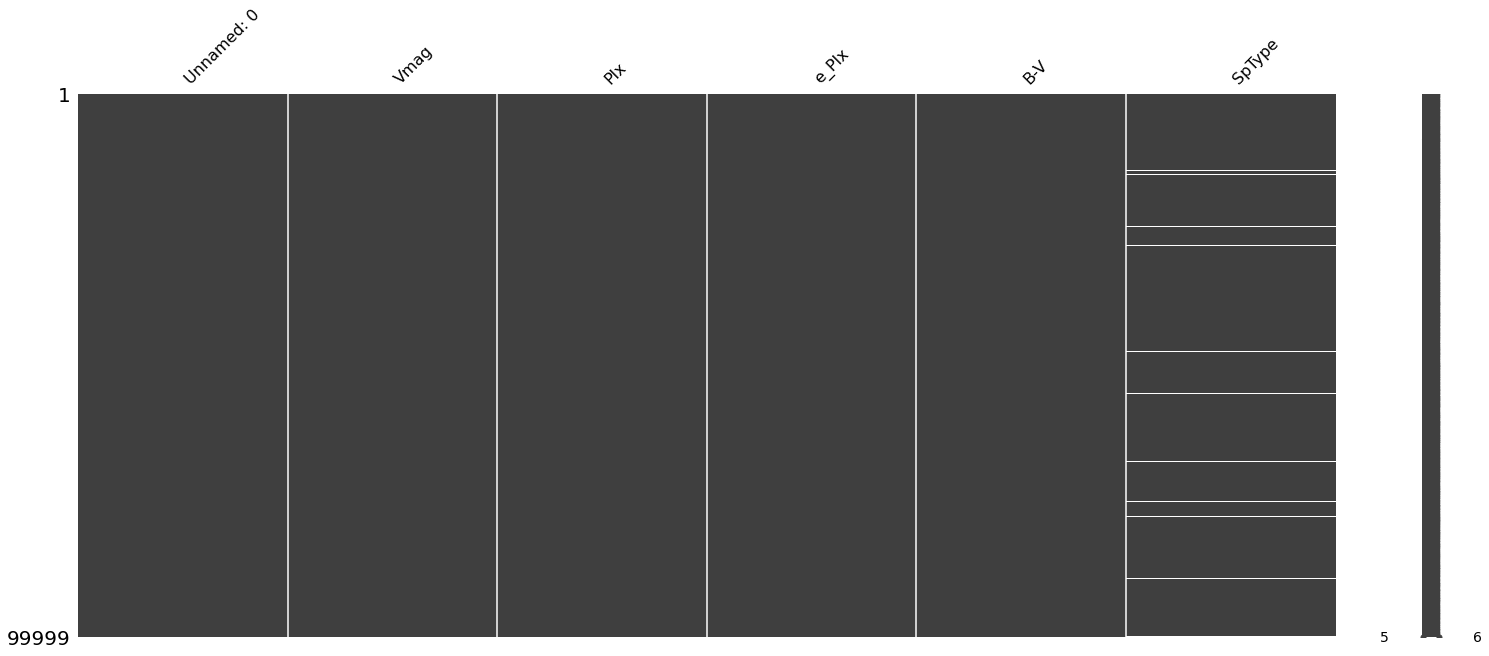

In [4]:
msno.matrix(df)

In [5]:
for col in df.columns:
    print(f"Total number of missing values in {col}: {df[col].isna().sum()}")
    if(df[col].isna().sum() != 0):
        print(f"Percentage in relation to the number of columns: {df[col].isna().sum()/len(df[col])}")
    print("")

Total number of missing values in Unnamed: 0: 0

Total number of missing values in Vmag: 0

Total number of missing values in Plx: 0

Total number of missing values in e_Plx: 0

Total number of missing values in B-V: 0

Total number of missing values in SpType: 2622
Percentage in relation to the number of columns: 0.026220262202622028



We see that there are practically no missing values in our dataset (that doesn't necessarily mean that all the values will be usefull or _correct_, it uniquely means that the value isn't null). The only values that are apparently missing are found in the last column, our target attribute. Hence we will remove these rows, since not only would it make our model worse, but also we wouln't be able to know if our prediction is correct or not.

In [6]:
df.dropna(inplace = True)

If we now count again the missing values we should get none:

In [7]:
for col in df.columns:
    print(f"Total number of missing values in {col}: {df[col].isna().sum()}")
    if(df[col].isna().sum() != 0):
        print(f"Percentage in relation to the number of columns: {df[col].isna().sum()/len(df[col])}")
    print("")

Total number of missing values in Unnamed: 0: 0

Total number of missing values in Vmag: 0

Total number of missing values in Plx: 0

Total number of missing values in e_Plx: 0

Total number of missing values in B-V: 0

Total number of missing values in SpType: 0



<a id='outliers'></a>
### Outlier removal

Now that we have no missing values, let's get rid of those that will not be useful for our dataset. Let's figure this one out column by column:

- [Visual magnitude of the star](#star_magnitude)
- [Distance from Earth](#earth_distance)
- [Standard error for the distance from Earth](#st_err)
- [B-V color index](#B_V)
- [Spectral type](#sp_type)

<a id='star_magnitude'></a>
**Visual magnitude of the star:** We will check out some metrics to see what the data is like. 

In [8]:
df['Vmag'].head()

0     9.10
1     9.27
2     6.61
3     8.06
4     8.55
Name: Vmag, dtype: object

In [9]:
print(df['Vmag'][0])
print(f"We see that the values in `Vmag` are of type {type(df['Vmag'][1])}")

 9.10
We see that the values in `Vmag` are of type <class 'str'>


This is obviously not correct, since we can clearly see that the values are decimals numbers. Therefore, we will convert the values of this column into float type:

In [10]:
df['Vmag'] = df['Vmag'].astype(float)

In [11]:
print(df['Vmag'][1])
print(f"We see that the values in `Vmag` are of type {type(df['Vmag'][1])}")

9.27
We see that the values in `Vmag` are of type <class 'numpy.float64'>


We have now successfully converted our data into floats, so we can properly have a look at the column:

In [12]:
df['Vmag'].describe()

count    97377.000000
mean         8.306432
std          1.263512
min         -1.440000
25%          7.620000
50%          8.410000
75%          9.080000
max         13.610000
Name: Vmag, dtype: float64

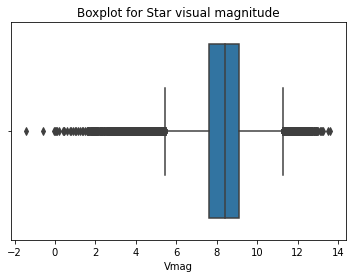

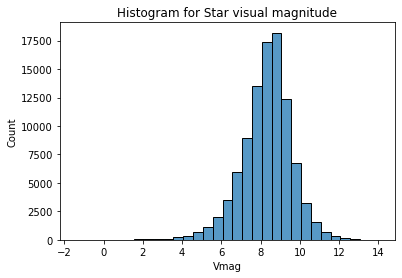

In [13]:
sns.boxplot(x=df['Vmag']).set_title("Boxplot for Star visual magnitude")
plt.show()

sns.histplot(data = df['Vmag'], binwidth=0.5).set_title("Histogram for Star visual magnitude")
plt.show()

We see that the minimum is a negative number, and the boxplots show quite clearly a couple of values below zero as well. This obviously doesn't make any sense, since we are talking about the star size, therefore, we will remove those values below zero. 

In [14]:
print(f"There is a total of {len([x for x in df['Vmag'] if x<0])} negative values, so we will remove them")

There is a total of 4 negative values, so we will remove them


In [15]:
idx_to_remove = [idx for idx in df.index if df['Vmag'].loc[idx] < 0]

df.drop(idx_to_remove, inplace = True)

For now it seems this column is ready to be used in a model. Let's have a look at the next one. 

<a id='earth_distance'></a>
**Distance from Earth:**

In [16]:
print(df['Plx'][0])
print(f"We see that the values in `Plx` are of type {type(df['Plx'][1])}")

#df['Plx'] = df['Plx'].astype(float)

   3.54
We see that the values in `Plx` are of type <class 'str'>


In this case, not only are they strings, but they also seem to have several spaces (or even be empty!), so we'll modify the strings in order for them to contain only characters so that later we can convert them into floats.

In [17]:
#remove spaces in strings
df['Plx'] = [value.replace(' ', '') for value in df['Plx']]

#remove rows with empty strings in the column `Plx`
idx_to_remove = [idx for idx in df.index if df['Plx'][idx] == '']
df.drop(idx_to_remove, inplace=True)

df['Plx'] = df['Plx'].astype(float)

Now we've successfully prepared the second column to analyse it. Let's see the what the values are and let's plot a histogram and a boxplot to check for outliers:

In [18]:
df['Plx'].describe()

count    97264.000000
mean         7.079696
std         10.821263
min        -35.100000
25%          2.510000
50%          4.590000
75%          8.260000
max        772.330000
Name: Plx, dtype: float64

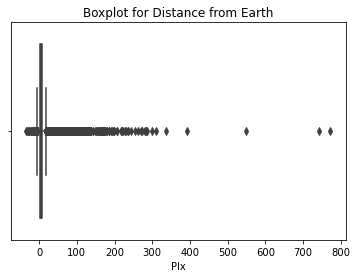

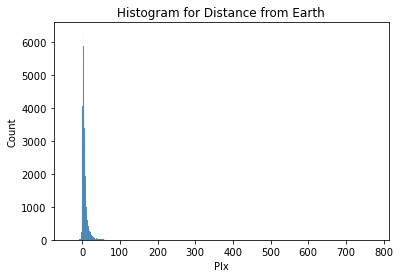

In [19]:
sns.boxplot(x=df['Plx']).set_title("Boxplot for Distance from Earth")
plt.show()

sns.histplot(data = df['Plx'], binwidth=0.5).set_title("Histogram for Distance from Earth")
plt.show()

These two plots let us know that we'll be treating with stars very far away, although most of them are relatively closer to the Earth. For the outlier removal, we will rely in the next column, which indicates the standard error of this distance.

In [20]:
print(f"There is a total of {len([x for x in df['Plx'] if x<0])} negative values, so we will remove them.")

if(len([x for x in df['Plx'] if x<0]) > 0):
    idx_to_remove = [idx for idx in df.index if df['Plx'].loc[idx] <= 0]
    df.drop(idx_to_remove, inplace = True)

There is a total of 3286 negative values, so we will remove them.


Let's now move on to the next attribute, which is in fact almost a continuation of the previous one. 

<a id='st_err'></a>
**Standard Error for the distance from Earth:**

In [21]:
print(df['e_Plx'][0])
print(f"We see that the values in `e_Plx` are of type {type(df['e_Plx'][1])}")

  1.39
We see that the values in `e_Plx` are of type <class 'str'>


In [22]:
#remove spaces in strings
df['e_Plx'] = [value.replace(' ', '') for value in df['e_Plx']]

#remove rows with empty strings in the column `Plx`
idx_to_remove = [idx for idx in df.index if df['e_Plx'][idx] == '']
df.drop(idx_to_remove, inplace=True)

df['e_Plx'] = df['e_Plx'].astype(float)

In [23]:
df['e_Plx'].describe()

count    93939.000000
mean         1.247271
std          1.098144
min          0.380000
25%          0.870000
50%          1.080000
75%          1.350000
max         69.070000
Name: e_Plx, dtype: float64

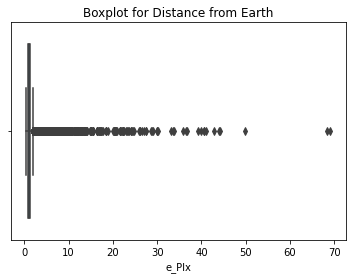

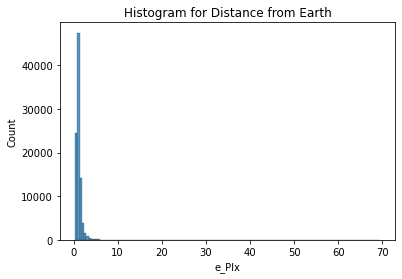

In [24]:
sns.boxplot(x=df['e_Plx']).set_title("Boxplot for Distance from Earth")
plt.show()

sns.histplot(data = df['e_Plx'], binwidth=0.5).set_title("Histogram for Distance from Earth")
plt.show()

Those who have an error that big, will not be usefull for our model therefore, we will remove those rows whose error is too big. To calculate that we will use the InterQuantile Range.

In [25]:
def outlier_ranges(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_bound = df[variable].quantile(0.25) - 3 * IQR
    upper_bound = df[variable].quantile(0.75) + 3 * IQR
    return (lower_bound, upper_bound)

lb, ub = outlier_ranges(df, 'e_Plx')
idx_to_remove = [idx for idx in df.index if df['e_Plx'][idx] < lb or df['e_Plx'][idx] > ub]
df.drop(idx_to_remove, inplace=True)

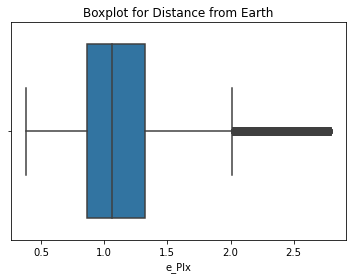

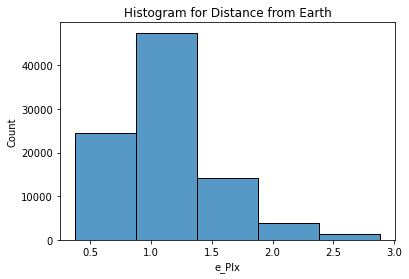

In [26]:
sns.boxplot(x=df['e_Plx']).set_title("Boxplot for Distance from Earth")
plt.show()

sns.histplot(data = df['e_Plx'], binwidth=0.5).set_title("Histogram for Distance from Earth")
plt.show()

Now we can consider the variable `Plx` fully corrected (null values, outliers and values with too big of an error removed). The last variable will be the color of the star. Let's have a look at that variable.

<a id='B_V'></a>
**B-V color index:**

In [27]:
print(df['e_Plx'][0])
print(f"We see that the values in `B-V` are of type {type(df['B-V'][0])}")

1.39
We see that the values in `B-V` are of type <class 'str'>


In [28]:
#remove spaces in strings
df['B-V'] = [value.replace(' ', '') for value in df['B-V']]

#remove rows with empty strings in the column `Plx`
idx_to_remove = [idx for idx in df.index if df['B-V'][idx] == '']
df.drop(idx_to_remove, inplace=True)

df['B-V'] = df['B-V'].astype(float)

In [29]:
df['B-V'].describe()

count    91079.000000
mean         0.693871
std          0.484081
min         -0.400000
25%          0.340000
50%          0.600000
75%          1.064000
max          5.460000
Name: B-V, dtype: float64

There can't be negative values in this column either, since the `B-V` color scale goes from 0 to 2. For this reason we will remove from our data the values below 0 and above 2. 

In [30]:
print(f"There is a total of {len([x for x in df['B-V'] if x<0])} values below 0 and {len([x for x in df['B-V'] if x>2])} values above 2")

if(len([x for x in df['B-V'] if x<0]) > 0 or len([x for x in df['B-V'] if x>2])):
    idx_to_remove = [idx for idx in df.index if df['B-V'].loc[idx] < 0 or df['B-V'].loc[idx] > 2]
    df.drop(idx_to_remove, inplace = True)

There is a total of 5647 values below 0 and 182 values above 2


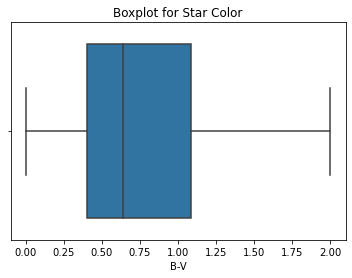

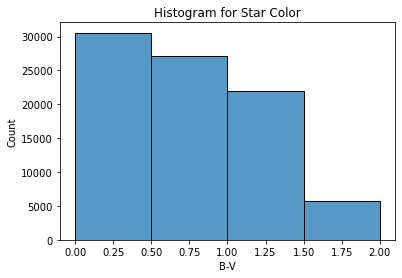

In [31]:
sns.boxplot(x=df['B-V']).set_title("Boxplot for Star Color")
plt.show()

sns.histplot(data = df['B-V'], binwidth=0.5).set_title("Histogram for Star Color")
plt.show()

There don't seem to be any outliers besides the values that we already removed, so we'll consider this column ready to be put in the model as well. 

Finally we'll have a look at the target attribute:

<a id='sp_type'></a>
**Spectral type:** 

This will be our target attribute, but our goal is to predict if the star is a dwarf or a giant, therefore there is no use in keeping the full spectral type of each star. For this reason, we will interpret the spectral type and assign the category "Dwarf" or "Giant" in a different column that we will name `Giant`; its value will be 1 if it's a giant and 0 if it's a dwarf. 

In [32]:
#new column for our dataset
Giant = []

#list of indexes corresponding to giant, dwarfs, special and mixed stars respectively
giant_idx = []
dwarf_idx = []
special_idx = []
mixed_idx = []

for idx,sptypes in zip(df.index, df['SpType']):
    sptype_list = re.findall(r"(IV|VI|V|III|II|I)", sptypes)

    giant_b = False
    dwarf_b = False
    
    for sptype in sptype_list:
        if(sptype == "I" or sptype == "II" or sptype == "III"): giant_b = True
        elif(sptype == "IV" or sptype == "V" or sptype == "VI"): dwarf_b = True
        
    if(giant_b and dwarf_b): mixed_idx.append(idx); Giant.append(-1)
    elif(giant_b): giant_idx.append(idx); Giant.append(1)
    elif(dwarf_b): dwarf_idx.append(idx); Giant.append(0)
    else: special_idx.append(idx); Giant.append(-1)

print(f"Number of giant stars: {len(giant_idx)}")
print(f"Number of dwarf stars: {len(dwarf_idx)}")
print(f"Number of special stars: {len(special_idx)}")
print(f"Number of either giants or dwarfs (spectral type listed as III/IV): {len(mixed_idx)}")

Number of giant stars: 17793
Number of dwarf stars: 22454
Number of special stars: 43813
Number of either giants or dwarfs (spectral type listed as III/IV): 1190


In order to classify the stars, we've analysed each value from the column `SpType`. If there wasn't any roman numeral in the spectral type, then it was stored as a special star. If there were one or more roman numerals, all associated with either a giant star or a dwarf star, then it was classified accordingly. Finally, if there were conflicting roman numerals (for example a III and a IV, where III is for giants and IV for dwarfs), then those were labeled as mixed.

We see that the majority of the instances are for special stars. These will not be part of our model, since we are not looking to predict special stars. That would be a potential improvement for our model, where we consider third category and try to predict if it's a giant a dwarf or a special star. For now, though, we will remove these from our dataset. 

The final amount of mixed stars is considerably small in comparison to the total amount of non-special stars (only about a 3%), so we will also drop these values in order to have a fully dichotomic dataset.

Since the column `SpType` will no longer be of use, we will dispose of it as well.

In [33]:
# adding the new column with binary values: 1 for giant, 0 for dwarf
df['Giant'] = Giant 
#droping the instances for special and mixed stars
df.drop(special_idx, inplace = True)
df.drop(mixed_idx, inplace = True)
#droping the column containing the spectral type
df.drop('SpType', axis = 1, inplace = True)

Let's now see if our target attribute is balanced or not. 

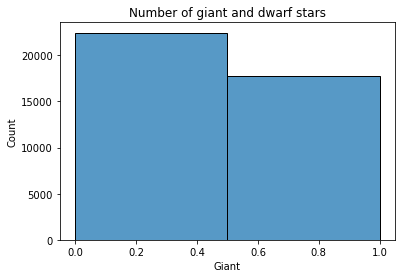

In [34]:
sns.histplot(data = df['Giant'], binwidth=0.5).set_title("Number of giant and dwarf stars")
plt.show()

Even though there are a few more dwarfs than giants, it's fairly balanced. Therefore, we will leave it as is (we won't remove any dwarfs from the data to make it equal). 

<a id='normalization'></a>
### Normalization

We will now proceed to normalize the values in our dataset so that the prediction will give better results.

Before that however, we will add a new variable to our data. Notice that the first two columns, `Vmag` and `Plx` (Visual magnitude of the star and Distance from earth) can be used to calculate the Absolute magnitude of the star using the formula: 
$$
M = m + 5\cdot\log_{10}(p+1)
$$
where $m$ represents the visual apparent magnitude `Vmag`, and $p$ represents stellar parallax `Plx`. We will name this new column `Amag`.

In [35]:
Amag = []
for vmag,plx in zip(df['Vmag'], df['Plx']):
    M = vmag + 5*math.log(plx+1,10)
    Amag.append(M)

df['Amag'] = Amag
ordered_cols = ['Vmag', 'Plx', 'e_Plx', 'Amag', 'B-V', 'Giant']

df = df[ordered_cols]

In [36]:
df.head()

,Vmag,Plx,e_Plx,Amag,B-V,Giant
3,8.06,7.75,0.97,12.770040,0.370,0
4,8.55,2.87,1.11,11.488555,0.902,1
9,8.59,10.76,1.10,13.942037,0.489,0
11,8.43,4.06,1.16,11.950753,1.484,1
12,8.80,3.49,1.48,12.061232,1.128,1


We will normalize our values between 0 and 1 as well as using min-max normalization. When trying different models later on, we will try with the two of them to determine which one will give us better results.

In [37]:
cols_to_normalize = ['Vmag', 'Plx', 'e_Plx', 'Amag', 'B-V']
normalized_df = (df[cols_to_normalize]-df[cols_to_normalize].mean())/df[cols_to_normalize].std()
min_max_normalized_df = (df[cols_to_normalize]-df[cols_to_normalize].min())/(df[cols_to_normalize].max()-df[cols_to_normalize].min())

normalized_df['Giant'] = df['Giant']
min_max_normalized_df['Giant'] = df['Giant']

Finally we have a clean and ready to use for analysis dataset. It has no missing values, no outliers and a clear and binary target attribute. We'll save this version of the dataset in a pickle file so that we don't have to recompile all the code above in order to get to the preprocessed data.

In [38]:
if not os.path.isdir('data'):
    os.mkdir('data')

with open('data/preprocessed_data.pickle', 'wb') as file:
    pickle.dump(df, file)

with open('data/preprocessed_data_min_max.pickle', 'wb') as file:
    pickle.dump(df, file)

## 1.2. Multivariate Analysis

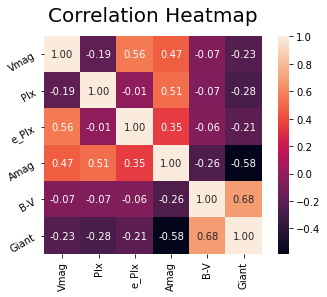

In [39]:
correlations = normalized_df.corr()

plt.title('Correlation Heatmap', fontsize=20, pad=15)
ax = sns.heatmap(correlations, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)     
plt.show()

In [40]:
abs_correlations = correlations.abs()
correlation_pairs = abs_correlations.unstack().sort_values(kind="quicksort", ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs != 1].drop_duplicates()

data = [list(n)+[v] for n,v in zip(correlation_pairs.index,correlation_pairs)]
display(Markdown('**Highest to lowest correlated pairs**'))
pd.DataFrame(data, columns = ['Attribute 1', 'Attribute 2', 'Correlation value'])

**Highest to lowest correlated pairs**

,Attribute 1,Attribute 2,Correlation value
0,Giant,B-V,0.680642
1,Giant,Amag,0.584472
2,e_Plx,Vmag,0.557459
3,Amag,Plx,0.512463
4,Vmag,Amag,0.465643
5,e_Plx,Amag,0.352007
6,Plx,Giant,0.278850
7,Amag,B-V,0.258744
8,Vmag,Giant,0.233790
9,Giant,e_Plx,0.205628


Conviently, the most correlated pairs are with our target variable. In particular being a Giant or Dwarf star seems to be highly correlated with the color of the star, as well as the absolute magnitude of the star. These correlations seem to make sense, since the magnitude of the star has surely something to do with being a giant or a dwarf. For the color, a quick check online confirms that a star's color is almost directly related to it's size, meaning the found correlation is correct, in our case. 

Just to visualize the correlation better, let's plot the correlations by pairs:

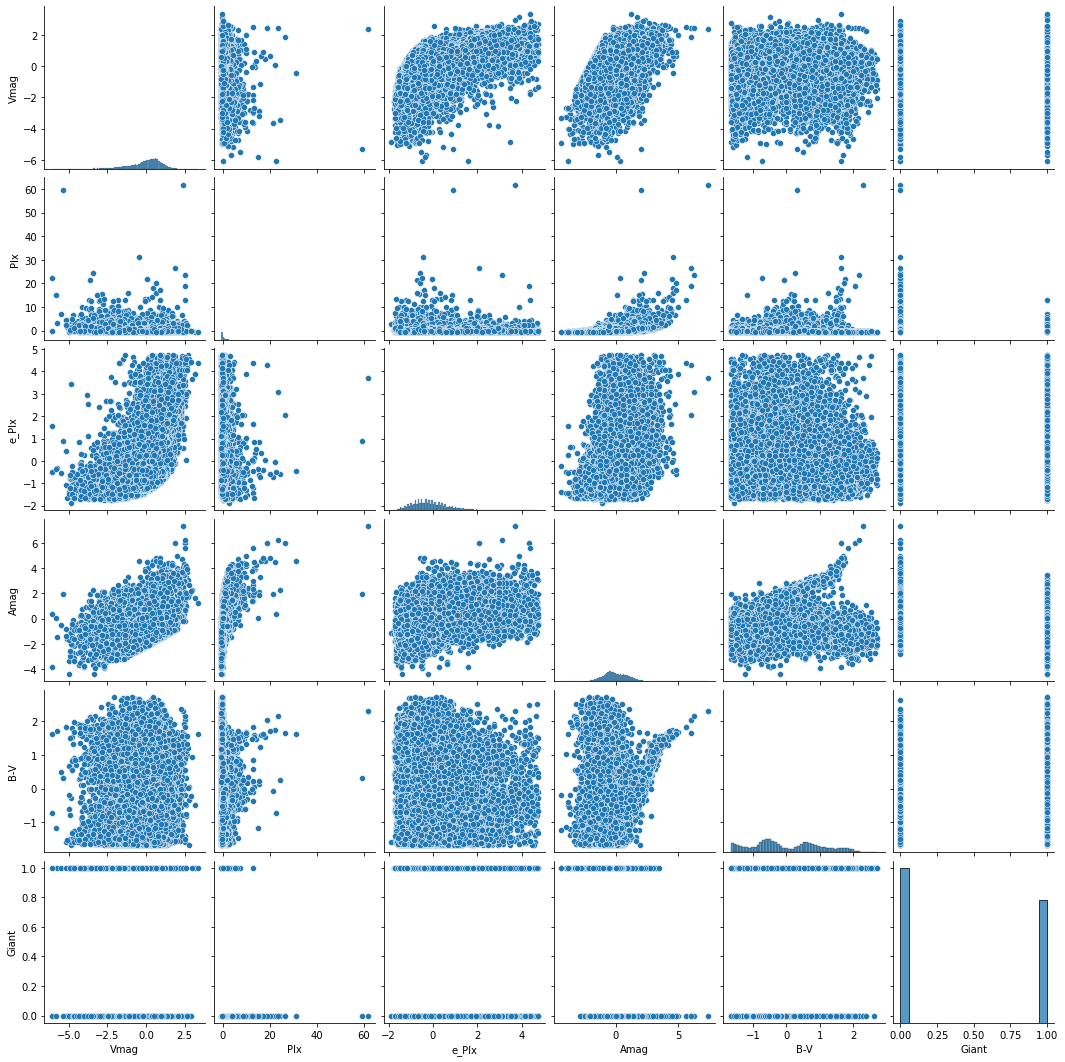

In [41]:
sns.pairplot(normalized_df, kind='scatter', diag_kind='hist')
plt.show()

We are now officially done with our data processing and multivariate analysis. Let's then move onto splitting our data into train and test.

## 1.3 Train-Test Split

We will splot the data between traind and test using a $20\%$ for the test set and $80\%$ for the train set.

In [51]:
# set predictors
X = normalized_df.drop(['Giant'], axis=1)

# set variable to predict
y = normalized_df['Giant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

And to finish up, let's store these dataframes in a pickle file, as we did previously, so that we can extract them and use them at any time wihout needing to redo all this process. 

In [47]:
dataset_list = [X_train, X_test,
                y_train, y_test]

with open('data/train_test.pickle', 'wb') as file:
    pickle.dump(dataset_list, file)

To load the data we will use:

In [48]:
with open('data/train_test.pickle', 'rb') as file:
    dataset_list = pickle.load(file)